# Sử dụng Linear Regression

- Nguyễn Hữu Vũ  
- Nhóm nghiên cứu về AI đại học Bách Khoa Tp. Hồ Chí Minh

### Problem:

- Xây dựng một model để dự đoán ``Sales`` dựa trên số tiền đã chi cho marketting trên các platforms khác nhau ``TV``, ``Radio``,
``Newspaper``

-  Dataset: advertising.csv


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Đọc dataset từ .csv file
advertising = pd.read_csv("advertising.csv")


## 1) Khám phá dữ liệu

In [3]:
advertising.shape

(200, 4)

In [4]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [5]:
advertising.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [6]:
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
TV           200 non-null float64
Radio        200 non-null float64
Newspaper    200 non-null float64
Sales        200 non-null float64
dtypes: float64(4)
memory usage: 6.3 KB


In [7]:
advertising.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

In [8]:
advertising.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Kiểm tra giá trị Null/Missing data

In [9]:
#Count the number of Null values for each column in the dataset
advertising.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

In [10]:
#Tính tỉ lệ % giá trị Null theo từng cột
advertising.isnull().sum()*100/advertising.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

#### => Không có giá trị nào Null nên không cần clean data

### Outlier analysis

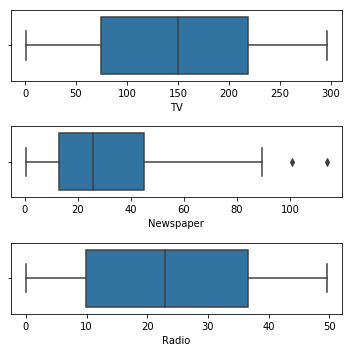

In [11]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(advertising['TV'], ax = axs[0])
plt2 = sns.boxplot(advertising['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(advertising['Radio'], ax = axs[2])
plt.tight_layout()

#### => Cột Newspaper có 2 giá trị outliers, không quá xa vùng data range, nên ta  không cần xử lí outliers trường hợp này

### Visualization: Xác định quan hệ giữa các biến dữ liệu

**Sử dụng pairplot**

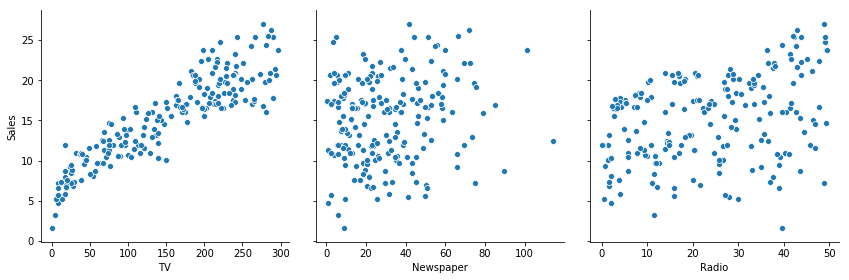

In [12]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(advertising, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

#### => **Nhìn vào biểu đồ trên ta thấy ``Sales`` có quan hệ tuyến tính với ``TV``**

**Sử dụng correlation table và heatmap**

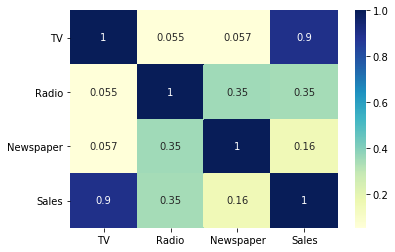

In [13]:
# Let's see the correlation between different variables.
sns.heatmap(advertising.corr(), cmap="YlGnBu", annot = True)
plt.show()

####  Tương tự, **Nhìn vào heatmap ta thấy ``Sales`` có quan hệ tuyến tính với ``TV``** với độ tương quan 0.9 (maximum = 1)

#### => Do đó chúng ta sẽ xây dựng mô hình Linear Regression để dự đoán ``Sales`` từ ``TV``

## 2) Xây dựng Regression Model 

#### Xác định  input (``X``) và output( ``y``)

In [14]:
X = pd.DataFrame(advertising['TV'])
y = pd.DataFrame(advertising['Sales'])

In [15]:
type(X)

pandas.core.frame.DataFrame

####  Spliting dataset into training set and test set


In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, test_size = 0.3, random_state = 100)

In [17]:
X_train.head()

,TV
74,213.4
3,151.5
185,205.0
26,142.9
90,134.3


In [18]:
y_train.head()

,Sales
74,17.0
3,16.5
185,22.6
26,15.0
90,14.0


In [19]:
X_train.shape

(140, 1)

In [20]:
y_train.shape

(140, 1)

####  Sử dụng model LinearRegression

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
#tạo model LinearRegression với thông số mặc định
model = LinearRegression()


In [23]:
#fit với bộ dữ liệu x, y
model.fit(X_train, y_train)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [24]:
#Hệ số của model: y = ax1 + bx2 + c => model.coef_ = [a,b]
model.coef_

array([[0.05454575]])

In [25]:
#Hệ số của model: y = ax1 + bx2 + c => model.intercept_ = [c]
model.intercept_

array([6.9486832])

#### ==> Phương trình thể hiện quan hệ tuyến tính giữa ``Sales`` và ``TV``: Sales = 0.054* TV + 6.948. 

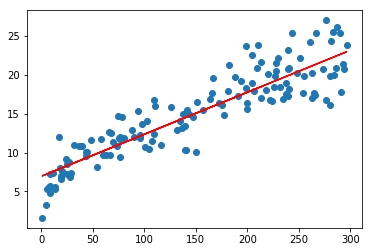

In [26]:
#Visualize xem dữ liệu được fit như thế nào
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()

#### Predictions:

**For training set:**

In [27]:
y_train_predict = model.predict(X_train)
y_train_predict


array([[18.58874687],
       [15.21236477],
       [18.13056255],
       [14.74327129],
       [14.27417782],
       [11.32325258],
       [20.02875475],
       [11.76507318],
       [ 8.00687081],
       [19.26511421],
       [14.37781475],
       [ 8.3177816 ],
       [ 9.02142181],
       [16.35782558],
       [12.93780687],
       [20.04511848],
       [19.60875245],
       [10.55415747],
       [18.86147564],
       [19.73966226],
       [ 8.24687212],
       [10.64688525],
       [23.11604436],
       [14.65599809],
       [16.49964454],
       [18.97602172],
       [11.11597872],
       [20.79239529],
       [17.37237658],
       [22.63604174],
       [12.42507679],
       [19.38511486],
       [13.80508434],
       [11.02325094],
       [10.08506399],
       [21.27785249],
       [21.28876164],
       [19.89784494],
       [19.34147826],
       [17.84692463],
       [19.40147859],
       [22.80513357],
       [22.05240218],
       [17.84692463],
       [20.00148187],
       [10

In [28]:
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predict)))
rmse

2.3984162246129914

In [29]:
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print("\n")

The model performance for training set
--------------------------------------
RMSE is 2.3984162246129914




**For testing set**

In [30]:
y_test_predict = model.predict(X_test)
y_test_predict


array([[ 7.37414007],
       [19.94148154],
       [14.32326899],
       [18.82329361],
       [20.13239168],
       [18.2287449 ],
       [14.54145201],
       [17.72692398],
       [18.75238413],
       [18.77420243],
       [13.34144544],
       [19.46693349],
       [10.01415451],
       [17.1923756 ],
       [11.70507285],
       [12.08689312],
       [15.11418241],
       [16.23237035],
       [15.8669138 ],
       [13.1068987 ],
       [18.65965635],
       [14.00690363],
       [17.60692332],
       [16.60328147],
       [17.03419291],
       [18.96511257],
       [18.93783969],
       [11.05597839],
       [17.03419291],
       [13.66326538],
       [10.6796127 ],
       [10.71234015],
       [13.5487193 ],
       [17.22510305],
       [ 9.67597085],
       [13.52144643],
       [12.25053038],
       [16.13418799],
       [19.07965865],
       [17.48692266],
       [18.69783838],
       [16.53237199],
       [15.92145955],
       [18.86693021],
       [13.5050827 ],
       [11

In [31]:
# root mean square error of the model
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predict)))
rmse

2.019296008966231

In [32]:

print("The model performance for testing set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))


The model performance for testing set
--------------------------------------
RMSE is 2.019296008966231


##### Visualizing the fit on the test set

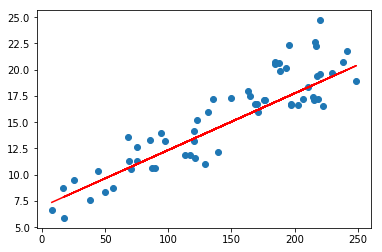

In [33]:
plt.scatter(X_test, y_test)
plt.plot(X_test, 6.948 + 0.054 * X_test, 'r')
plt.show()